In [13]:
#importing libraries here
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)
from scipy.spatial import distance
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt
import numpy as np
import random

Mounted at /content/drive


In [14]:
#Creating 2D arrays for each of the data set

#gets the twoCircles.txt data and puts it into a 2D array
with open('/content/drive/My Drive/Q1_Data/twoCircles.txt') as file:
  twoCirclesData = [[float(digit) for digit in line.split()] for line in file]

#gets the twoEllipses.txt data and puts it into a 2D array
with open('/content/drive/My Drive/Q1_Data/twoEllipses.txt') as file:
  twoEllipsesData = [[float(digit) for digit in line.split()] for line in file]

#gets the fourCircles.txt data and puts it into a 2D array
with open('/content/drive/My Drive/Q1_Data/fourCircles.txt') as file:
  fourCirclesData = [[float(digit) for digit in line.split()] for line in file]

#gets the t4.8k.txt data and puts it into a 2D array
with open('/content/drive/My Drive/Q1_Data/t4.8k.txt') as file:
  t48kData = [[float(digit) for digit in line.split()] for line in file]

In [15]:
#initilizing variables
centroidMean1 = 0
centroidMean2 = 0
combinedCentroidMean = 1.0 #the combination of the means of both centroids for a data set
meanDiff = 1.0
iterations = 0

In [16]:
#initializes the centroids for each data set by choosing two random points
#not sure what will happen if two centroids are the same

twoCirclesCentroid1 = random.choice(twoCirclesData)
twoCirclesCentroid2 = random.choice(twoCirclesData)

twoEllipsesCentroid1 = random.choice(twoEllipsesData)
twoEllipsesCentroid2 = random.choice(twoEllipsesData)

fourCirclesCentroid1 = random.choice(fourCirclesData)
fourCirclesCentroid2 = random.choice(fourCirclesData)

t48kCentroid1 = random.choice(t48kData)
t48kCentroid2 = random.choice(t48kData)

#creates arrays to keep track of which clusters each points belong to
twoCirclesCheck = np.zeros(len(twoCirclesData))
twoEllipsesCheck = np.zeros(len(twoEllipsesData))
fourCirclesCheck = np.zeros(len(fourCirclesData))
t48kCheck = np.zeros(len(t48kData))

In [ ]:
#performing kMeans for twoCirclesData
tempx1 = 0.0
tempy1 = 0.0
tempCount1 = 1 #counts how many points belong to cluster 1

tempx2 = 0.0
tempy2 = 0.0
tempCount2 = 1 #counts how many points belong to cluster 2

arrCount = 0

plt.figure(figsize = (5, 5)) #not sure if this is needed

#plots the initial graph and should only plot the x, y values, not the cluster which the point belongs to
for i in twoCirclesData:
  plt.scatter(i[:][0], i[:][1], color = "yellow")

plt.scatter(twoCirclesCentroid1[0], twoCirclesCentroid1[1], color = "red")
plt.scatter(twoCirclesCentroid2[0], twoCirclesCentroid2[1], color = "blue")
plt.title("Initial Plot Using Two Circles Data:")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

while iterations < 20 or meanDiff < .001:
  arrCount = 0
  combinedCentroidMean = 0
  for i in twoCirclesData:
    #compares Euclidean distance between the point and either centroid 1/2
    #if closer to centroid 1, then the 3rd axis (or whatever its called) is set to 1; otherwise, it will be set to 2; initially set to 0 or null I think
    #also, adds the x, y points to temp variables which are used to calculate the combinedCentroidMean
    euclidean1 = distance.euclidean(twoCirclesCentroid1[0:1], i[0:1])
    euclidean2 = distance.euclidean(twoCirclesCentroid2[0:1], i[0:1])

    if euclidean1 > euclidean2:
      twoCirclesCheck[arrCount] = 1
      tempx1 += twoCirclesCentroid1[0]
      tempy1 += twoCirclesCentroid1[1]
      tempCount1 += 1
      arrCount += 1

    else:
      twoCirclesCheck[arrCount] = 2
      tempx2 += twoCirclesCentroid2[0]
      tempy2 += twoCirclesCentroid2[1]
      tempCount2 += 1
      arrCount += 1

  #finds the mean of both centroids and the combinedCentroidMean
  centroidMean1 = math.sqrt(tempx1 + tempy1) / tempCount1
  centroidMean2 = math.sqrt(tempx2 + tempy2) / tempCount2
  combinedCentroidMean = centroidMean1 + centroidMean2
  meanDiff = abs(centroidMean2 - centroidMean1)

  #adjust the x and y for each centroid
  twoCirclesCentroid1[0] = tempx1 / tempCount1
  twoCirclesCentroid1[1] = tempy1 / tempCount1

  twoCirclesCentroid2[0] = tempx2 / tempCount2
  twoCirclesCentroid2[1] = tempy2 / tempCount2

  #plots updated graph after an iteration
  arrCount = 0
  for i in twoCirclesCheck:
    if i == 1:
        plt.scatter(twoCirclesData[arrCount][0], twoCirclesData[arrCount][1], color = "blue")
    else:
        plt.scatter(twoCirclesData[arrCount][0], twoCirclesData[arrCount][1], color = "red")
    arrCount += 1

  plt.scatter(twoCirclesCentroid1[0], twoCirclesCentroid1[1], color = "red")
  plt.scatter(twoCirclesCentroid2[0], twoCirclesCentroid2[1], color = "blue")
  plt.title("Two Circles Data Plot #" + str(iterations + 1))
  plt.xlabel("X-Axis")
  plt.ylabel("Y-Axis")
  plt.show() #note to self, just need to add the final graph created and the initial graph in the report

  iterations += 1

#output of final results
print("The final mean using the two circles data is: " + str(combinedCentroidMean))
#for loop that outputs the cluster which each point belongs to
for i in twoCirclesCheck:
  print(i, end = " ")
print("The number of iterations is: " + str(iterations))
print("The final threshold is: " + str(meanDiff))

In [ ]:
#performing kMeans for twoEllipses

#resetting iteration counter and combined centroid mean for further use
combinedCentroidMean = 1.0
iterations = 0
meanDiff = 1.0

tempx1 = 0.0
tempy1 = 0.0
tempCount1 = 1

tempx2 = 0.0
tempy2 = 0.0
tempCount2 = 1

arrCount = 0

plt.figure(figsize = (5, 5)) #not sure if this is needed

#plots the initial graph and should only plot the x, y values, not the cluster which the point belongs to
for i in twoEllipsesData:
  plt.scatter(i[:][0], i[:][1], color = "yellow")

plt.scatter(twoEllipsesCentroid1[0], twoEllipsesCentroid1[1], color = "red")
plt.scatter(twoEllipsesCentroid2[0], twoEllipsesCentroid2[1], color = "blue")
plt.title("Initial Plot Using Two Ellipses Data:")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

while iterations < 20 or meanDiff < .001:
  arrCount = 0
  combinedCentroidMean = 0
  for i in twoEllipsesData:
      #compares Euclidean distance between the point and either centroid 1/2
      #if closer to centroid 1, then the 3rd axis (or whatever its called) is set to 1; otherwise, it will be set to 2; initially set to 0 or null I think
      #also, adds the x, y points to temp variables which are used to calculate the combinedCentroidMean
      euclidean1 = distance.euclidean(twoEllipsesCentroid1[0:1], i[0:1])
      euclidean2 = distance.euclidean(twoEllipsesCentroid2[0:1], i[0:1])
       
      if euclidean1 > euclidean2:
        twoEllipsesCheck[arrCount] = 1
        tempx1 += twoEllipsesCentroid1[0]
        tempy1 += twoEllipsesCentroid1[1]
        tempCount1 += 1
        arrCount += 1

      else:
       twoEllipsesCheck[arrCount] = 2
       tempx2 += twoEllipsesCentroid2[0]
       tempy2 += twoEllipsesCentroid2[1]
       tempCount2 += 1
       arrCount += 1

  #finds the mean of both centroids and the combinedCentroidMean
  centroidMean1 = math.sqrt(tempx1 + tempy1) / tempCount1
  centroidMean2 = math.sqrt(tempx2 + tempy2) / tempCount2
  combinedCentroidMean = centroidMean1 + centroidMean2
  meanDiff = abs(centroidMean2 - centroidMean1)

  #adjust the x and y for each centroid
  twoEllipsesCentroid1[0] = tempx1 / tempCount1
  twoEllipsesCentroid1[1] = tempy1 / tempCount1

  twoEllipsesCentroid2[0] = tempx2 / tempCount2
  twoEllipsesCentroid2[1] = tempy2 / tempCount2

  #plots updated graph after an iteration
  arrCount = 0
  for i in twoEllipsesCheck:
    if i == 1:
      plt.scatter(twoEllipsesData[arrCount][0], twoEllipsesData[arrCount][1], color = "blue")
    else:
      plt.scatter(twoEllipsesData[arrCount][0], twoEllipsesData[arrCount][1], color = "red")
    arrCount += 1
  
  plt.scatter(twoEllipsesCentroid1[0], twoEllipsesCentroid1[1], color = "red")
  plt.scatter(twoEllipsesCentroid2[0], twoEllipsesCentroid2[1], color = "blue")
  plt.title("Two Ellipses Data Plot #" + str(iterations + 1))
  plt.xlabel("X-Axis")
  plt.ylabel("Y-Axis")
  plt.show() #note to self, just need to add the final graph created and the initial graph in the report

  iterations += 1

#output of final results
print("The final mean using the two circles data is: " + str(combinedCentroidMean))
#for loop that outputs the cluster which each point belongs to
for i in twoEllipsesCheck:
  print(i, end = " ")
print("The number of iterations is: " + str(iterations))
print("The final threshold is: " + str(meanDiff))

In [ ]:
#performing kMeans for fourCircles

#resetting iteration counter and combined centroid mean for further use
combinedCentroidMean = 1.0
iterations = 0
meanDiff = 1.0

tempx1 = 0.0
tempy1 = 0.0
tempCount1 = 1

tempx2 = 0.0
tempy2 = 0.0
tempCount = 1

arrCount = 0

plt.figure(figsize = (5, 5)) #not sure if this is needed

#plots the initial graph and should only plot the x, y values, not the cluster which the point belongs to
for i in fourCirclesData:
  plt.scatter(i[:][0], i[:][1], color = "yellow")

plt.scatter(fourCirclesCentroid1[0], fourCirclesCentroid1[1], color = "red")
plt.scatter(fourCirclesCentroid2[0], fourCirclesCentroid2[1], color = "blue")
plt.title("Initial Plot Using Four Circles Data:")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

while iterations < 20 or meanDiff < .001:
  arrCount = 0
  for i in fourCirclesData:
  #compares Euclidean distance between the point and either centroid 1/2
  #if closer to centroid 1, then the 3rd axis (or whatever its called) is set to 1; otherwise, it will be set to 2; initially set to 0 or null I think
  #also, adds the x, y points to temp variables which are used to calculate the combinedCentroidMean
   euclidean1 = distance.euclidean(fourCirclesCentroid1[0:1], i[0:1])
   euclidean2 = distance.euclidean(fourCirclesCentroid2[0:1], i[0:1])

   if euclidean1 > euclidean2:
    fourCirclesCheck[arrCount] = 1
    tempx1 += fourCirclesCentroid1[0]
    tempy1 += fourCirclesCentroid1[1]
    tempCount1 += 1
    arrCount += 1

  else:
    fourCirclesCheck[arrCount] = 2
    tempx2 += fourCirclesCentroid2[0]
    tempy2 += fourCirclesCentroid2[1]
    tempCount2 += 1
    arrCount += 1

  #finds the mean of both centroids and the combinedCentroidMean
  centroidMean1 = math.sqrt(tempx1 + tempy1) / tempCount1
  centroidMean2 = math.sqrt(tempx2 + tempy2) / tempCount2
  combinedCentroidMean = centroidMean1 + centroidMean2
  meanDiff = abs(centroidMean2 - centroidMean1)

  #adjust the x and y for each centroid
  fourCirclesCentroid1[0] = tempx1 / tempCount1
  fourCirclesCentroid1[1] = tempy1 / tempCount1

  fourCirclesCentroid2[0] = tempx2 / tempCount2
  fourCirclesCentroid2[1] = tempy2 / tempCount2

  #plots updated graph after an iteration
  arrCount = 0
  for i in fourCirclesCheck:
    if i == 1:
      plt.scatter(fourCirclesData[arrCount][0], fourCirclesData[arrCount][1], color = "blue")
    else:
      plt.scatter(fourCirclesData[arrCount][0], fourCirclesData[arrCount][1], color = "red")
    arrCount += 1

  plt.scatter(fourCirclesCentroid1[0], fourCirclesCentroid1[1], color = "red")
  plt.scatter(fourCirclesCentroid2[0], fourCirclesCentroid2[1], color = "blue")
  plt.title("Four Circles Data Plot #" + str(iterations + 1))
  plt.xlabel("X-Axis")
  plt.ylabel("Y-Axis")
  plt.show() #note to self, just need to add the final graph created and the initial graph in the report

  iterations += 1

#output of final results
print("The final mean using the two circles data is: " + str(combinedCentroidMean))
#for loop that outputs the cluster which each point belongs to
for i in fourCirclesCheck:
  print(i, end = " ")
print("The number of iterations is: " + str(iterations))
print("The final threshold is: " + str(meanDiff))

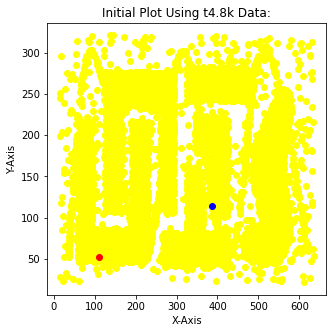

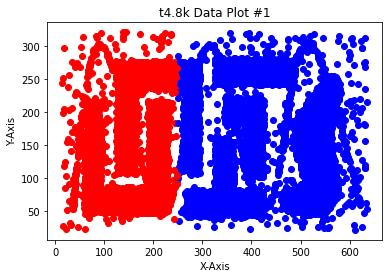

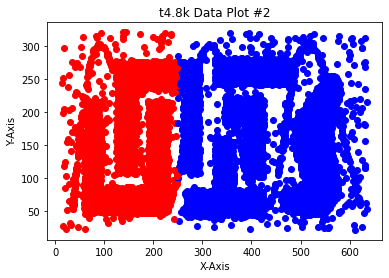

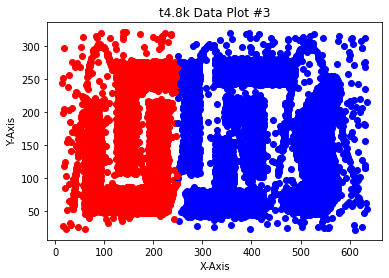

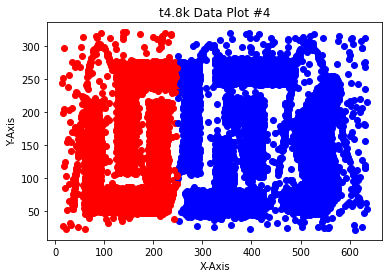

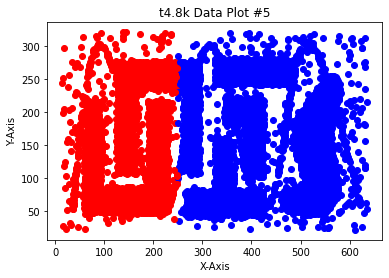

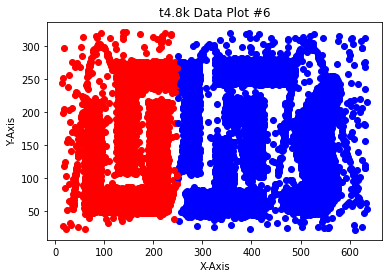

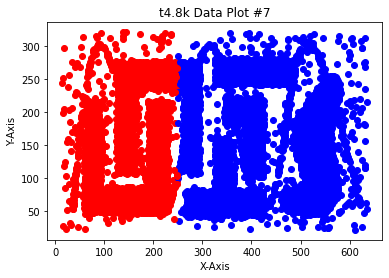

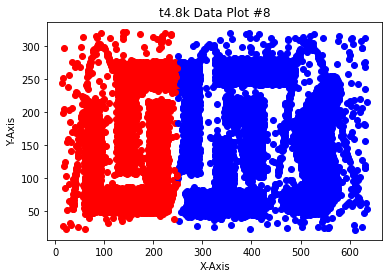

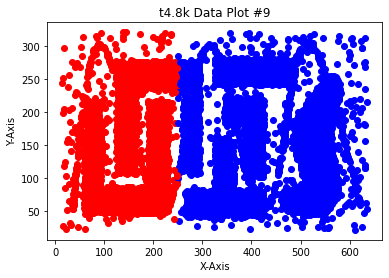

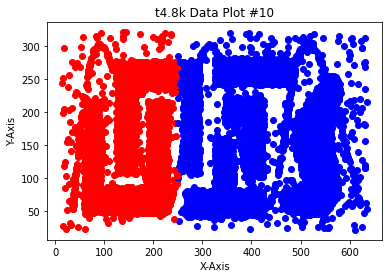

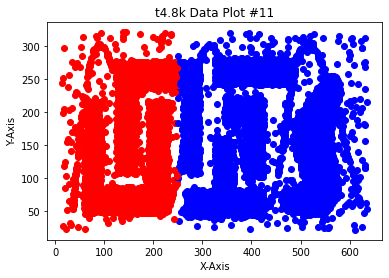

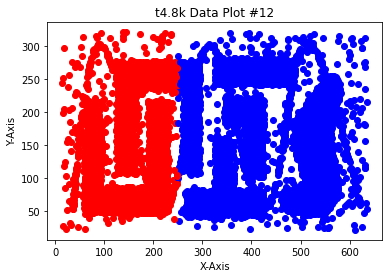

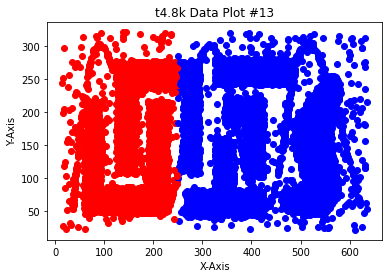

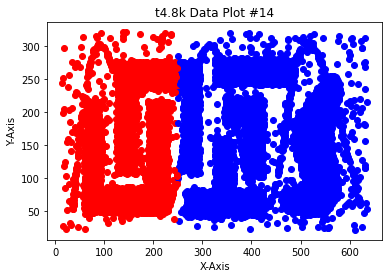

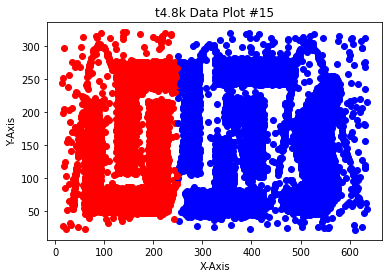

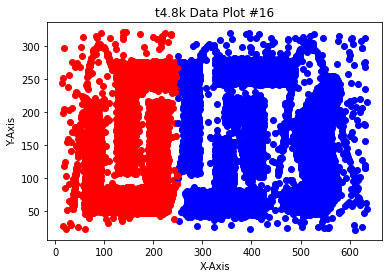

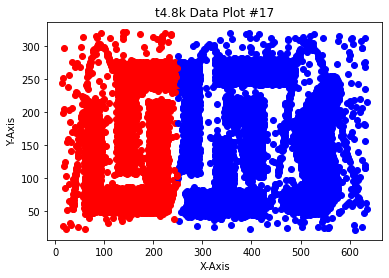

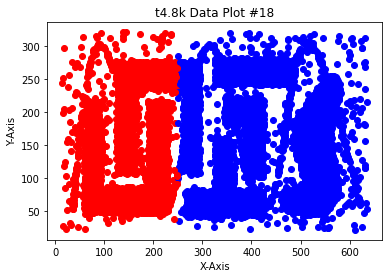

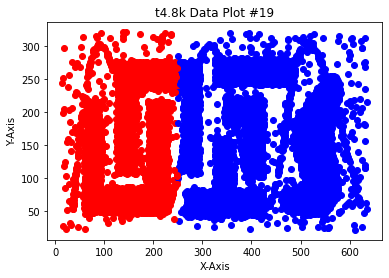

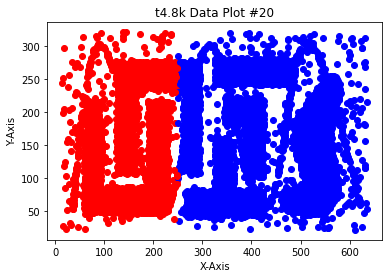

The final mean using the two circles data is: 0.13110808938906077
2.0 1.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0 2.0 2.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 2.0 2.0 1.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 2.0 2.0 1.0 1.0 1.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0 1.

In [18]:
#performing for t4.8k

#resetting iteration counter and combined centroid mean for further use
combinedCentroidMean = 1.0
iterations = 0
meanDiff = 1.0

tempx1 = 0.0
tempy1 = 0.0
tempCount1 = 1

tempx2 = 0.0
tempy2 = 0.0
tempCount2 = 1

arrCount = 0

plt.figure(figsize = (5, 5)) #not sure if this is needed

#plots the initial graph and should only plot the x, y values, not the cluster which the point belongs to
for i in t48kData:
  plt.scatter(i[:][0], i[:][1], color = "yellow")

plt.scatter(t48kCentroid1[0], t48kCentroid1[1], color = "red")
plt.scatter(t48kCentroid2[0], t48kCentroid2[1], color = "blue")
plt.title("Initial Plot Using t4.8k Data:")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

while iterations < 20 or meanDiff < .001:
  arrCount = 0
  for i in t48kData:
    #compares Euclidean distance between the point and either centroid 1/2
    #if closer to centroid 1, then the 3rd axis (or whatever its called) is set to 1; otherwise, it will be set to 2; initially set to 0 or null I think
    #also, adds the x, y points to temp variables which are used to calculate the combinedCentroidMean
     euclidean1 = distance.euclidean(t48kCentroid1[0:1], i[0:1])
     euclidean2 = distance.euclidean(t48kCentroid2[0:1], i[0:1])
     if euclidean1 > euclidean2:
      t48kCheck[arrCount] = 1
      tempx1 += t48kCentroid1[0]
      tempy1 += t48kCentroid1[1]
      tempCount1 += 1
      arrCount += 1

     else:
      t48kCheck[arrCount] = 2
      tempx2 += t48kCentroid2[0]
      tempy2 += t48kCentroid2[1]
      tempCount2 += 1
      arrCount += 1

  #finds the mean of both centroids and the combinedCentroidMean
  centroidMean1 = math.sqrt(tempx1 + tempy1) / tempCount1
  centroidMean2 = math.sqrt(tempx2 + tempy2) / tempCount2
  combinedCentroidMean = centroidMean1 + centroidMean2
  meanDiff = abs(centroidMean2 - centroidMean1)

  #adjust the x and y for each centroid
  t48kCentroid1[0] = tempx1 / tempCount1
  t48kCentroid1[1] = tempy1 / tempCount1

  t48kCentroid2[0] = tempx2 / tempCount2
  t48kCentroid2[1] = tempy2 / tempCount2

  #plots updated graph after an iteration
  arrCount = 0
  for i in t48kCheck:
    if i == 1:
      plt.scatter(t48kData[arrCount][0], t48kData[arrCount][1], color = "blue")
    else:
      plt.scatter(t48kData[arrCount][0], t48kData[arrCount][1], color = "red")
    arrCount += 1
      
  plt.scatter(t48kCentroid1[0], t48kCentroid1[1], color = "red")
  plt.scatter(t48kCentroid2[0], t48kCentroid2[1], color = "blue")
  plt.title("t4.8k Data Plot #" + str(iterations + 1))
  plt.xlabel("X-Axis")
  plt.ylabel("Y-Axis")
  plt.show() #note to self, just need to add the final graph created and the initial graph in the report

  iterations += 1

#output of final results
print("The final mean using the two circles data is: " + str(combinedCentroidMean))
#for loop that outputs the cluster which each point belongs to
for i in t48kCheck:
  print(i, end = " ")
print("The number of iterations is: " + str(iterations))
print("The final threshold is: " + str(meanDiff))